   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


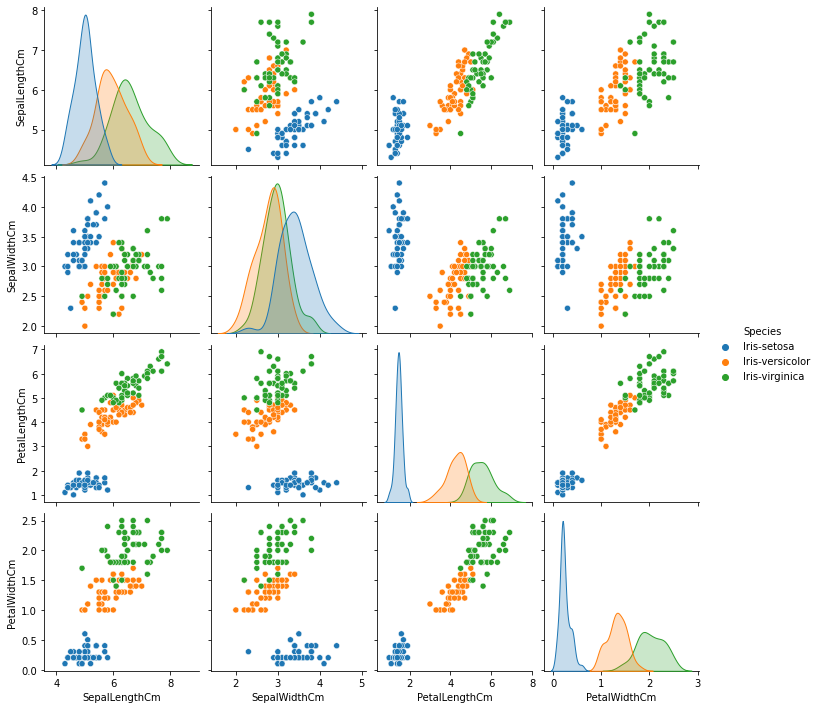

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import expit

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобятся для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return expit(x)
    #return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [2]:
def train(N, E):
    ### Шаг 3. Обученние нейронной сети
    # присваевание случайных весов
    np.random.seed(0)
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 5 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = N

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(E):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100


    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    plt.plot(errors)
    plt.title(f'N={N:.2f}, E={E}')
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 

    print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

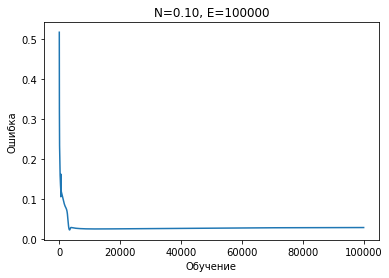

Точность нейронной сети 97.2%


In [3]:
# Обычный запуск
train(N=0.1, E=100000)

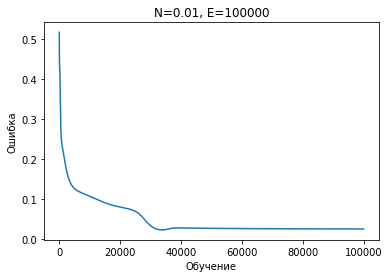

Точность нейронной сети 97.55%


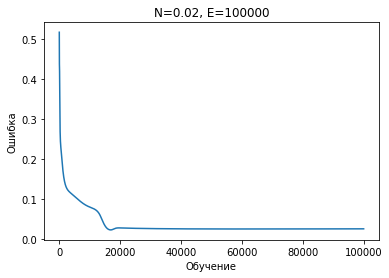

Точность нейронной сети 97.52%


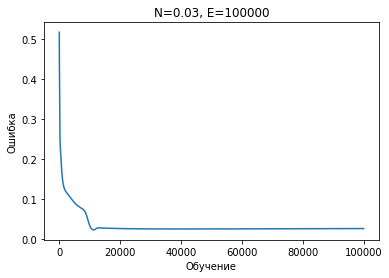

Точность нейронной сети 97.45%


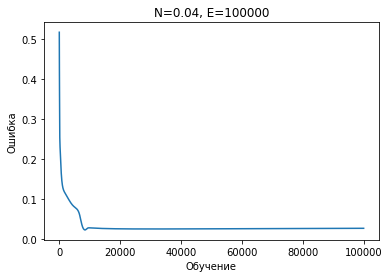

Точность нейронной сети 97.39%


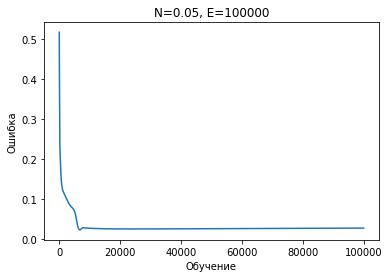

Точность нейронной сети 97.33%


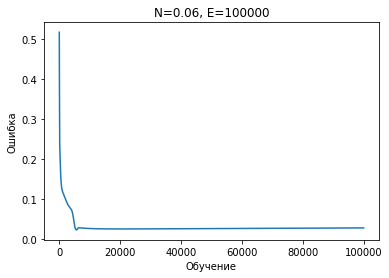

Точность нейронной сети 97.29%


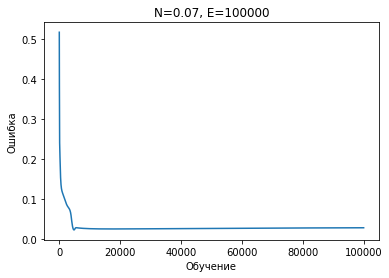

Точность нейронной сети 97.26%


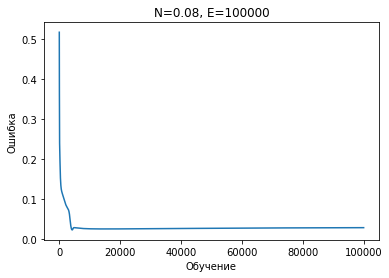

Точность нейронной сети 97.23%


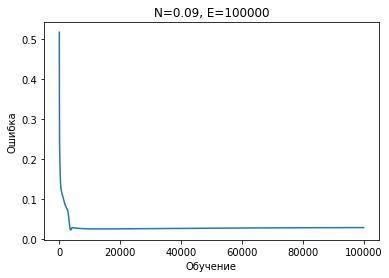

Точность нейронной сети 97.22%


In [4]:
# Запуск с разными меньшими шагами
for i_n in np.arange(0.01, 0.1, 0.01):
    train(N=i_n, E=100000)

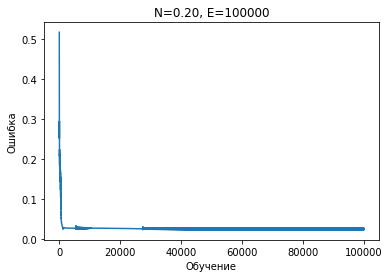

Точность нейронной сети 97.28%


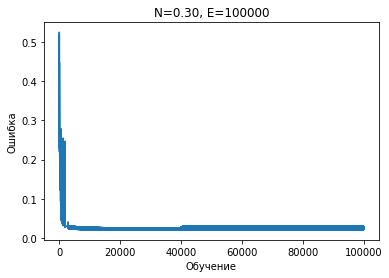

Точность нейронной сети 97.57%


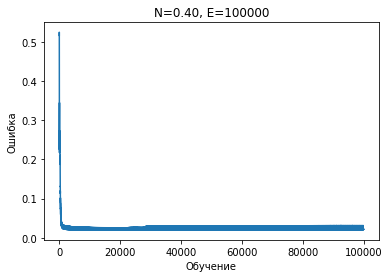

Точность нейронной сети 97.84%


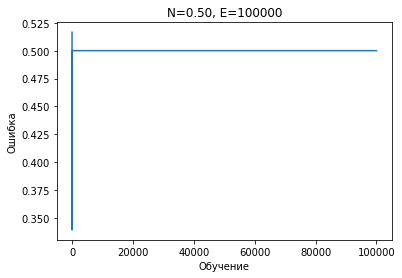

Точность нейронной сети 50.0%


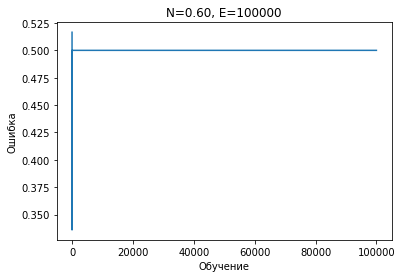

Точность нейронной сети 50.0%


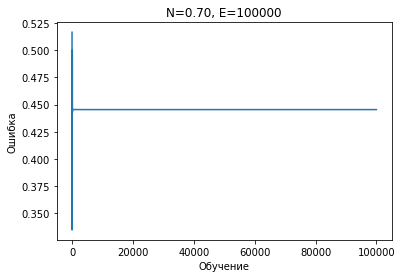

Точность нейронной сети 55.47%


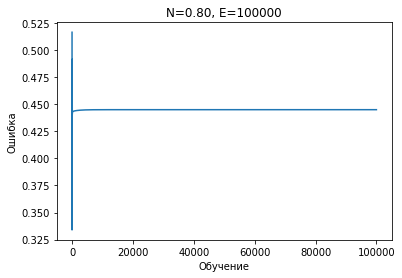

Точность нейронной сети 55.5%


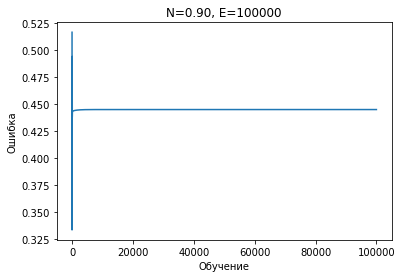

Точность нейронной сети 55.5%


In [5]:
# Запуск с разными большими шагами
for i_n in np.arange(0.2, 1, 0.1):
    train(N=i_n, E=100000)

In [6]:
# При маленьком шаге больше вероятность, что получим лучший результат, но зато расчёт будет дольше.
# При большом шаге результат зависит от случайности, надо контролировать момент, чтобы не улетело значение из нормы
# поэтому процесс надо контроллировать и брать оптимальные значения

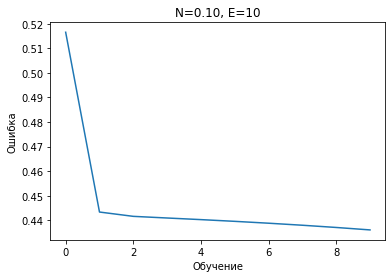

Точность нейронной сети 56.39%


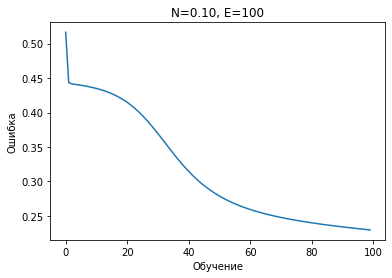

Точность нейронной сети 77.03%


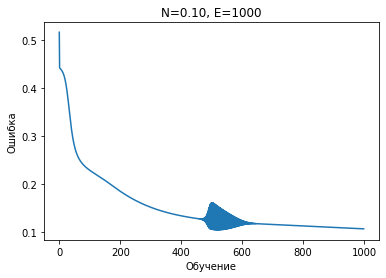

Точность нейронной сети 89.26%


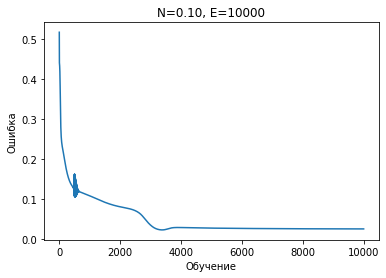

Точность нейронной сети 97.55%


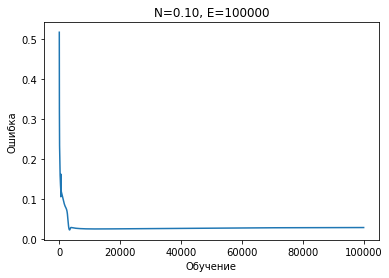

Точность нейронной сети 97.2%


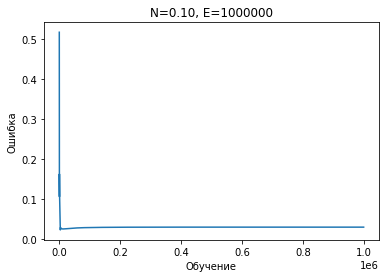

Точность нейронной сети 97.1%


In [7]:
# Запуск с разным количеством эпох
for i_e in range(1, 7):
    train(N=0.1, E=10**i_e)

In [8]:
# Увеличение эпох приводит к улучшению точности нейронной сети
# C определенного момента качество начинает снижаться.

In [9]:
def train_m(N, E, L):
    ### Шаг 3. Обученние нейронной сети
    # присваевание случайных весов
    np.random.seed(0)
    w0 = 2*np.random.random((4, L)) - 1 # для входного слоя   - 4 входа, 5 выхода
    w1 = 2*np.random.random((L, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = N

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(E):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100


    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    plt.plot(errors)
    plt.title(f'N={N:.2f}, E={E}')
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    #plt.show() # расскоментируйте, чтобы посмотреть 

    print("Точность нейронной сети " + str(L) + "-" + str(round(accuracy,2)) + "%")

Точность нейронной сети 4-97.22%
Точность нейронной сети 5-97.55%
Точность нейронной сети 6-97.26%
Точность нейронной сети 7-97.2%
Точность нейронной сети 8-97.12%
Точность нейронной сети 9-97.24%
Точность нейронной сети 10-97.19%
Точность нейронной сети 11-97.21%
Точность нейронной сети 12-97.08%
Точность нейронной сети 13-97.08%
Точность нейронной сети 14-97.1%
Точность нейронной сети 15-97.07%
Точность нейронной сети 16-97.06%
Точность нейронной сети 17-97.14%
Точность нейронной сети 18-97.14%
Точность нейронной сети 19-97.1%


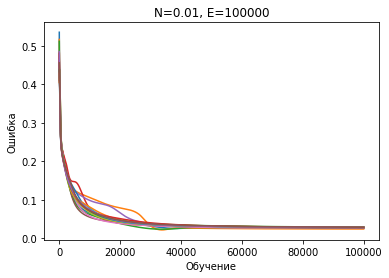

In [10]:
# Варьируем число нейронов в слое
for l_i in range(4, 20):
    train_m(N=0.01, E=100000, L=l_i)

In [11]:
# Изменение числа нейронов для модели из двух слоёв не привело к значимым изменениям.

In [12]:
# Строим нейронную сеть из 3 слоев.
def train_3l(N, E, L01, L12):
    ### Шаг 3. Обученние нейронной сети
    # присваевание случайных весов
    np.random.seed(10)
    w0 = 2*np.random.random((4, L01)) - 1 # для входного слоя   - 4 входа, 4 выхода
    w1 = 2*np.random.random((L01, L12)) - 1 # для внутреннего слоя - 4 входа, 4 выхода
    w2 = 2*np.random.random((L12, 3)) - 1 # для внутреннего слоя - 4 входа, 3 выхода

    # скорость обучения (learning rate)
    n = N

    # массив для ошибок, чтобы потом построить график
    errors = []
    
    # процесс обучения
    for i in range(E):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
        layer3 = sigmoid(np.dot(layer2, w2))
        
        # обратное распространение(back propagation) с использованием градиентного спуска
        layer3_error = y_train - layer3
        layer3_delta = layer3_error * sigmoid_deriv(layer3)

        layer2_error = layer3_delta.dot(w2.T)
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w2 += layer2.T.dot(layer3_delta) * n
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer3_error))
        errors.append(error)
        accuracy = (1 - error) * 100


    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    #plt.plot(errors)
    #plt.title(f'N={N:.2f}, E={E}')
    #plt.xlabel('Обучение')
    #plt.ylabel('Ошибка')
    #plt.show() # раскомментируйте, чтобы посмотреть 

    print(f"Точность нейронной сети N={N}, E={E}, L01={L01}, L12={L12}: " + str(round(accuracy,2)) + "%")

In [13]:
# варьируем число нейронов в 3-слойной ней.сети
for l01_i in range(4, 20):
    for l12_i in range(4, 20):
        train_3l(N=0.01, E=100000, L01=l01_i, L12=l12_i)

Точность нейронной сети N=0.01, E=100000, L01=4, L12=4: 97.76%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=5: 97.4%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=6: 96.89%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=7: 97.27%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=8: 97.74%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=9: 97.29%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=10: 97.42%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=11: 97.26%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=12: 95.74%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=13: 97.32%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=14: 96.96%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=15: 97.41%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=16: 97.32%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=17: 97.27%
Точность нейронной сети N=0.01, E=100000, L01=4, L12=18: 97.34%
Точность нейронной сети N=0.01, E=100000, L01=4

Точность нейронной сети N=0.01, E=100000, L01=12, L12=5: 97.87%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=6: 98.14%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=7: 97.9%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=8: 97.16%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=9: 97.26%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=10: 97.43%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=11: 97.37%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=12: 97.43%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=13: 97.24%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=14: 97.27%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=15: 97.42%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=16: 97.29%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=17: 97.39%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=18: 97.25%
Точность нейронной сети N=0.01, E=100000, L01=12, L12=19: 97.38%
Точность нейронной сети N=0.01,

In [14]:
# увеличение слоев дает более точные результаты